In [1]:
import feets
import feets.preprocess
import matplotlib
import matplotlib.pyplot as plt
import json
import numpy as np
from operator import itemgetter

In [2]:
def parser1(filename):
	'''
	Reads and returns each object into format to be read by the neural network.
	'''
	_id=ra=dec=_type=None
	obs=[]
	u=g=r=i=z=0
	u_error=g_error=r_error=i_error=z_error=0

	with open(filename,'r') as f:
		first_obs=None
		data=json.load(f)
		_id=data['objID1']
		ra=data['ra']
		dec=data['dec']
		_type=data['type']
		redshift=data['redshift']
		if _type==None:
			print(_id)
		candis=[]
		obs=data['obs'] # a dict of all candidates
		if len(obs)>4:
			for ob in obs.values():
				mjd_mean=np.mean([band['mjd'] for band in ob.values()]) # set the mean mjd for the 5 bands
				candis.append([float(mjd_mean)]+[ob['u']['psfMag'],ob['g']['psfMag'],ob['r']['psfMag'],ob['i']['psfMag'],ob['z']['psfMag']]+[ob['u']['psfMagErr'],ob['g']['psfMagErr'],ob['r']['psfMagErr'],ob['i']['psfMagErr'],ob['z']['psfMagErr']])
		candis = sorted(candis, key=itemgetter(0))
		first_obs = candis[0][0]
		candis = [[float(x[0]-first_obs)]+x[1:] for x in candis]
	return _id, ra, dec, candis, _type, redshift

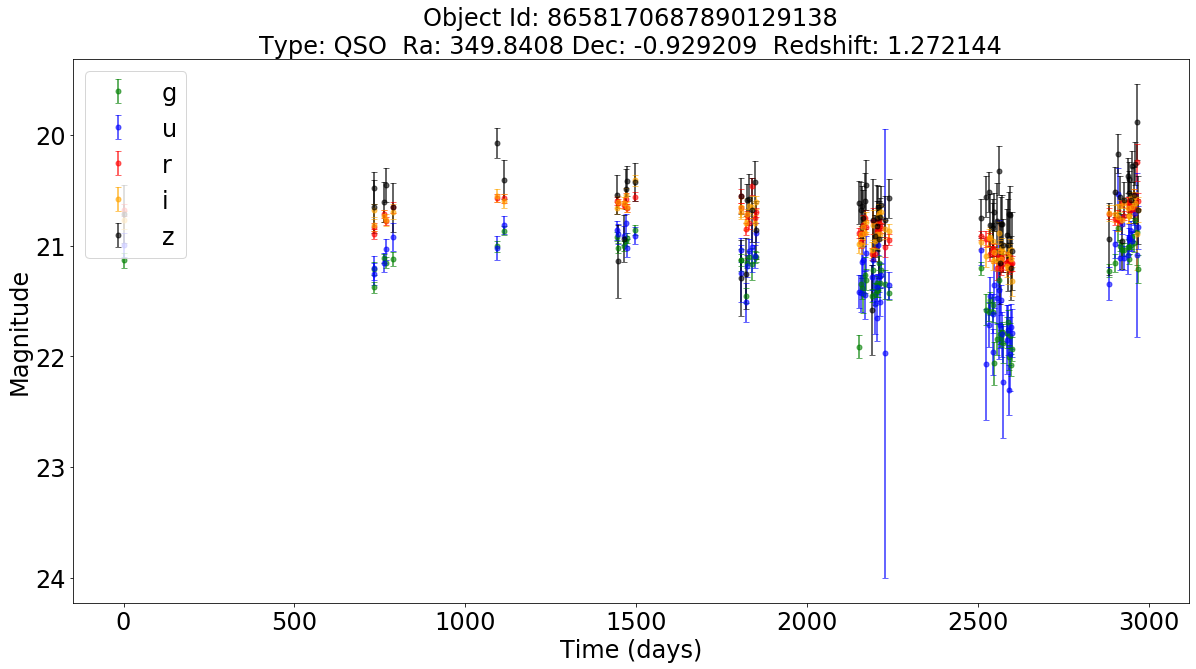

In [7]:
_id, ra, dec, candis, _type, redshift=parser1('../../../data/quasar_obs/8658170687890129138.json')
time = np.array([x[0] for x in candis])
mag_u = np.array([x[1] for x in candis])
mag_g = np.array([x[2] for x in candis])
mag_r = np.array([x[3] for x in candis])
mag_i = np.array([x[4] for x in candis])
mag_z = np.array([x[5] for x in candis])
mag_ue = np.array([x[6] for x in candis])
mag_ge = np.array([x[7] for x in candis])
mag_re = np.array([x[8] for x in candis])
mag_ie = np.array([x[9] for x in candis])
mag_ze = np.array([x[10] for x in candis])

if _type=="QSO": t = "QSO"
if _type=="non-QSO": t = "Star"
# print(time)

plt.figure(figsize = (20,10))
plt.title("Object Id: "+str(_id)+"\nType: "+t+"  Ra: "+str(ra)+" Dec: "+str(dec)+"  Redshift: "+str(redshift),fontsize=24)
plt.errorbar(time, mag_g,yerr=mag_ge, alpha = 0.6,fmt='o',ecolor='green',color='green',elinewidth=2,capsize=3,ms=5,label = 'g')
plt.errorbar(time, mag_u,yerr=mag_ue, alpha = 0.6,fmt='o',ecolor='blue',color='blue',elinewidth=2,capsize=3,ms=5,label = 'u')
plt.errorbar(time, mag_r,yerr=mag_re, alpha = 0.6,fmt='o',ecolor='red',color='red',elinewidth=2,capsize=3,ms=5,label = 'r')
plt.errorbar(time, mag_i,yerr=mag_ie, alpha = 0.6,fmt='o',ecolor='orange',color='orange',elinewidth=2,capsize=3,ms=5,label = 'i')
plt.errorbar(time, mag_z,yerr=mag_ze, alpha = 0.6,fmt='o',ecolor='black',color='black',elinewidth=2,capsize=3,ms=5,label = 'z')
# plt.yticks(np.linspace(30,20,20))
# plt.xlim(1858,1861)
# plt.ylim(18,24)
# plt.xticks(np.linspace(1750,2000,1))
plt.legend(loc="upper left",fontsize=24)
plt.xlabel("Time (days)",fontsize=24)
plt.ylabel("Magnitude",fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.gca().invert_yaxis()
plt.savefig('quasar.png', format='png')

Text(0, 0.5, 'Value Difference')

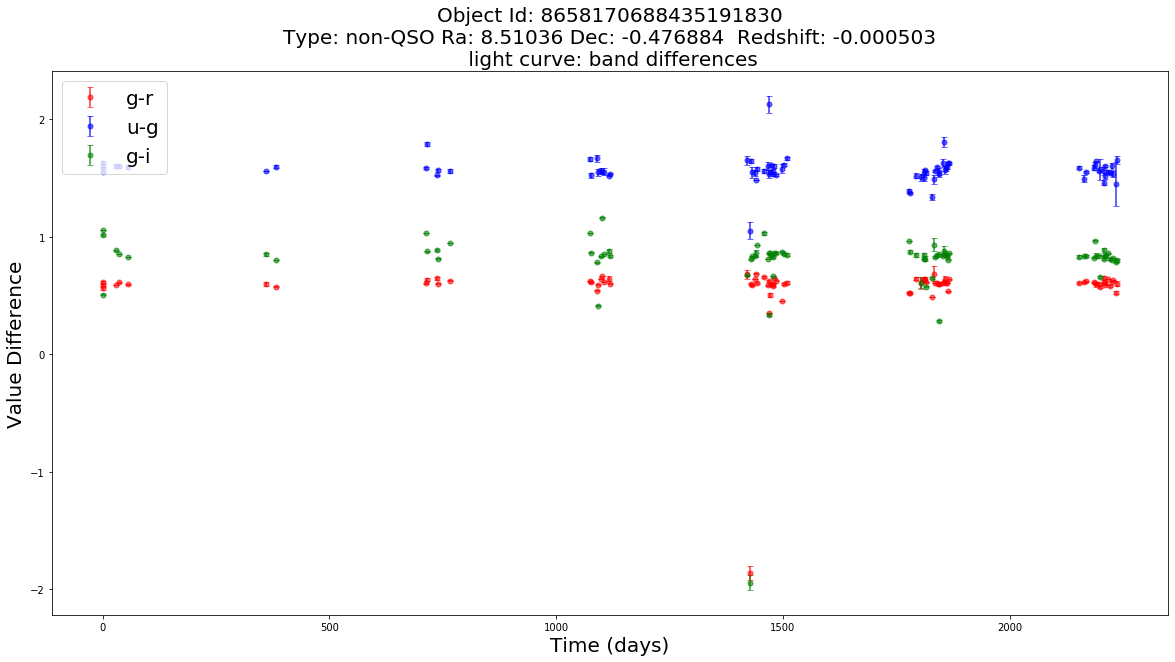

In [11]:
plt.figure(figsize = (20,10))
plt.title("Object Id: "+str(_id)+"\nType: "+t+" Ra: "+str(ra)+" Dec: "+str(dec)+"  Redshift: "+str(redshift)+"\n light curve: band differences",fontsize=20)
# plt.plot(time, mag_g-mag_r,'.',color='red',label = 'g-r')
plt.errorbar(time, mag_g-mag_r,yerr=mag_ge-mag_re, alpha = 0.6,fmt='o',ecolor='red',color='red',elinewidth=2,capsize=3,ms=5,label = 'g-r')
plt.errorbar(time, mag_u-mag_g,yerr=mag_ue-mag_ge, alpha = 0.6,fmt='o',ecolor='blue',color='blue',elinewidth=2,capsize=3,ms=5,label = 'u-g')
plt.errorbar(time, mag_g-mag_i,yerr=mag_ge-mag_ie, alpha = 0.6,fmt='o',ecolor='green',color='green',elinewidth=2,capsize=3,ms=5,label = 'g-i')
# plt.errorbar(time, mag_r-mag_i,yerr=mag_re-mag_ie, alpha = 0.6,fmt='o',ecolor='orange',color='orange',elinewidth=2,capsize=3,ms=5,label = 'r-i')
plt.legend(loc="upper left",fontsize=20)
plt.xlabel("Time (days)",fontsize=20)
plt.ylabel("Value Difference",fontsize=20)

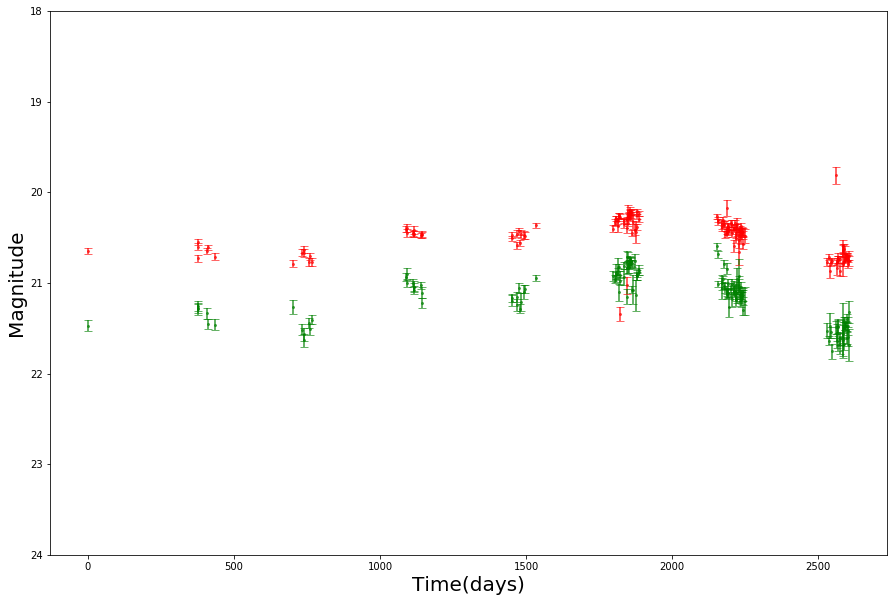

In [9]:
time, mag, error = feets.preprocess.remove_noise(time, mag_g, mag_ge)
time2, mag2, error2 = feets.preprocess.remove_noise(time, mag_r, mag_re)
atime, amag, amag2, aerr, aerr2 = feets.preprocess.align(time, time2, mag, mag2, error, error2)
lc = [atime, amag, amag2, aerr, aerr2]

plt.figure(figsize = (15,10))
plt.errorbar(lc[0], lc[2], yerr=lc[4], alpha = 0.6,fmt='o',ecolor='red',color='red',elinewidth=2,capsize=4,ms=2,label = 'r')
plt.errorbar(lc[0], lc[1], yerr=lc[3], alpha = 0.6,fmt='o',ecolor='green',color='green',elinewidth=2,capsize=4,ms=2,label = 'g')
plt.xlabel("Time(days)",fontsize=20)
plt.ylabel("Magnitude",fontsize=20)
plt.ylim(18,24)
# plt.xlim(250,1000,1)
plt.gca().invert_yaxis()
# print(atime)